In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../hba')
import visualization
import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [138]:
#ファイルの読込
df = pd.read_csv("../csv/全突合R4マスタ240524.csv")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   病院                                     27926 non-null  object
 1   医療機関名_x                                27926 non-null  object
 2   都道府県コード_x                              27926 non-null  object
 3   構想区域コード_x                              27926 non-null  object
 4   構想区域名称_x                               27926 non-null  object
 5   市区町村名称_x                               27926 non-null  object
 6   設置主体（2022（令和4）年7月1日時点）                 27926 non-null  object
 7   DPC医療機関群の種類                            27926 non-null  object
 8   特定機能病院の承認の有無                           27926 non-null  object
 9   地域医療支援病院の承認の有無                         27926 non-null  object
 10  総合入院体制加算の届出の有無                         27926 non-null  object
 11  急性期充実体制加算の届出の有無

/tmp/ipykernel_38937/1539367363.py:2: DtypeWarning: Columns (2,3,15,16,17,18,19,20,21,22,24,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csv/全突合R4マスタ240524.csv")


In [139]:
#スプシバグ手動修正
df.rename(columns={'施設全体_医師_常勤':'病棟コード\n（R4）', '施設全体_医師_非常勤':'病棟名_x', '病棟コード\n（R4）':'建築時期', '病棟名_x':'構造', '建築時期':'保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
        '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）':'保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）'}, inplace=True)
df.drop(['医師_専従','医師_専任','救急車の受入件数','休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数','夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'],axis=1,inplace=True)
df.head()

,病院,医療機関名_x,都道府県コード_x,構想区域コード_x,構想区域名称_x,市区町村名称_x,設置主体（2022（令和4）年7月1日時点）,DPC医療機関群の種類,特定機能病院の承認の有無,地域医療支援病院の承認の有無,総合入院体制加算の届出の有無,急性期充実体制加算の届出の有無,三次救急医療施設の認定の有無,二次救急医療施設の認定の有無,救急告示病院の告示の有無,病棟コード\n（R4）,病棟名_x,建築時期,構造,保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）,保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）,一般病床_許可病床,一般病床_最大使用病床数,一般病床_最小使用病床数,療養病床_許可病床,療養病床_最大使用病床数,療養病床_最小使用病床数,新規入棟患者数（年間）,うち予定入院の患者・院内の他病棟からの転棟患者,うち、予定外の救急医療入院以外の入院患者（年間）,うち、予定外の救急医療入院の患者（年間）,在棟患者延べ数（年間）,退棟患者数（年間）,新規入棟患者数（年間）.1,うち、院内の他病棟からの転棟（年間）,うち、家庭からの入院（年間）,うち、他の病院、診療所からの転院（年間）,うち、介護施設、福祉施設からの入院（年間）,うち、介護医療院からの入院（年間）,うち、院内の出生（年間）,うち、その他（年間）,構想区域人口
0,病院,市立函館恵山病院,1,101,南渡島,函館市,市町村,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,有り,有り,101010042101,病棟,2002,鉄筋コンクリート造,慢性期,慢性期,0,0,0,60,40,29,106,28,69,9,12371,110,106,0,43,28,35,0,0,0,359223
1,病院,医療法人社団玄心会吉田眼科病院,1,101,南渡島,函館市,医療法人,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,無し,無し,101010069101,病棟,1983,鉄筋コンクリート造,急性期,急性期,40,40,10,0,0,0,1182,1120,0,62,9827,1184,1182,1171,0,1,10,0,0,0,359223
2,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044101,３階東病棟,2000,鉄骨鉄筋コンクリート造,急性期,急性期,34,23,3,0,0,0,1184,592,560,32,5930,1172,1184,33,1026,6,0,0,119,0,359223
3,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044102,３階南病棟（休床中）,2000,鉄骨鉄筋コンクリート造,休棟中（今後再開する予定）,高度急性期,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,359223
4,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044103,４階東病棟,2000,鉄骨鉄筋コンクリート造,高度急性期,高度急性期,48,48,27,0,0,0,1008,566,66,376,16107,988,1008,259,677,26,46,0,0,0,359223


In [140]:
#ファイル追加
add_df = pd.read_csv("../csv/全突合R4マスタ240527.csv")
add_df.columns = add_df.iloc[0]
add_df = add_df[1:].reset_index(drop=True)
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   休日に受診した患者延べ数                          27926 non-null  object 
 1   休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数      27926 non-null  object 
 2   夜間・時間外に受診した患者延べ数                      27926 non-null  object 
 3   夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  27926 non-null  object 
 4   救急車の受入件数                              27926 non-null  object 
 5   施設全体_医師_常勤                            27926 non-null  object 
 6   施設全体_医師_非常勤                           27926 non-null  object 
 7   nan                                   0 non-null      float64
 8   nan                                   0 non-null      float64
 9   nan                                   0 non-null      float64
 10  nan                                   0 non-null      float64
 11  nan            

In [141]:
add_df = add_df[['休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '救急車の受入件数','施設全体_医師_常勤','施設全体_医師_非常勤']]
df = pd.concat([df, add_df], axis=1)

In [142]:
#ファイル追加
add_df = pd.read_csv("../csv/全突合R4マスタ240529.csv")
add_df.columns = add_df.iloc[0]
add_df = add_df[1:].reset_index(drop=True)
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   医療機関名_x                27926 non-null  object 
 1   手術総数                   26855 non-null  object 
 2   全身麻酔の手術総数              26855 non-null  object 
 3   放射線治療                  26855 non-null  object 
 4   化学療法                   26855 non-null  object 
 5   nan                    0 non-null      float64
 6   nan                    0 non-null      float64
 7   nan                    0 non-null      float64
 8   nan                    0 non-null      float64
 9   nan                    0 non-null      float64
 10  nan                    0 non-null      float64
 11  nan                    0 non-null      float64
 12  nan                    0 non-null      float64
 13  nan                    0 non-null      float64
 14  nan                    0 non-null      float64
 15  na

In [143]:
add_df = add_df[['手術総数','全身麻酔の手術総数','放射線治療','化学療法']]
df = pd.concat([df, add_df], axis=1)
df.head()

,病院,医療機関名_x,都道府県コード_x,構想区域コード_x,構想区域名称_x,市区町村名称_x,設置主体（2022（令和4）年7月1日時点）,DPC医療機関群の種類,特定機能病院の承認の有無,地域医療支援病院の承認の有無,総合入院体制加算の届出の有無,急性期充実体制加算の届出の有無,三次救急医療施設の認定の有無,二次救急医療施設の認定の有無,救急告示病院の告示の有無,病棟コード\n（R4）,病棟名_x,建築時期,構造,保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）,保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）,一般病床_許可病床,一般病床_最大使用病床数,一般病床_最小使用病床数,療養病床_許可病床,療養病床_最大使用病床数,療養病床_最小使用病床数,新規入棟患者数（年間）,うち予定入院の患者・院内の他病棟からの転棟患者,うち、予定外の救急医療入院以外の入院患者（年間）,うち、予定外の救急医療入院の患者（年間）,在棟患者延べ数（年間）,退棟患者数（年間）,新規入棟患者数（年間）.1,うち、院内の他病棟からの転棟（年間）,うち、家庭からの入院（年間）,うち、他の病院、診療所からの転院（年間）,うち、介護施設、福祉施設からの入院（年間）,うち、介護医療院からの入院（年間）,うち、院内の出生（年間）,うち、その他（年間）,構想区域人口,休日に受診した患者延べ数,休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,夜間・時間外に受診した患者延べ数,夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,救急車の受入件数,施設全体_医師_常勤,施設全体_医師_非常勤,手術総数,全身麻酔の手術総数,放射線治療,化学療法
0,病院,市立函館恵山病院,1,101,南渡島,函館市,市町村,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,有り,有り,101010042101,病棟,2002,鉄筋コンクリート造,慢性期,慢性期,0,0,0,60,40,29,106,28,69,9,12371,110,106,0,43,28,35,0,0,0,359223,60,30,104,40,66,2,1,25,0,0,0
1,病院,医療法人社団玄心会吉田眼科病院,1,101,南渡島,函館市,医療法人,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,無し,無し,101010069101,病棟,1983,鉄筋コンクリート造,急性期,急性期,40,40,10,0,0,0,1182,1120,0,62,9827,1184,1182,1171,0,1,10,0,0,0,359223,64,0,20,10,15,3,3,1157,60,0,60
2,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044101,３階東病棟,2000,鉄骨鉄筋コンクリート造,急性期,急性期,34,23,3,0,0,0,1184,592,560,32,5930,1172,1184,33,1026,6,0,0,119,0,359223,2459,1052,2882,1181,5674,125,1,417,163,20,40
3,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044102,３階南病棟（休床中）,2000,鉄骨鉄筋コンクリート造,休棟中（今後再開する予定）,高度急性期,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,359223,2459,1052,2882,1181,5674,125,1.6,245,141,15,25
4,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044103,４階東病棟,2000,鉄骨鉄筋コンクリート造,高度急性期,高度急性期,48,48,27,0,0,0,1008,566,66,376,16107,988,1008,259,677,26,46,0,0,0,359223,2459,1052,2882,1181,5674,125,1.6,322,169,20,35


array([<Axes: ylabel='Count'>], dtype=object)

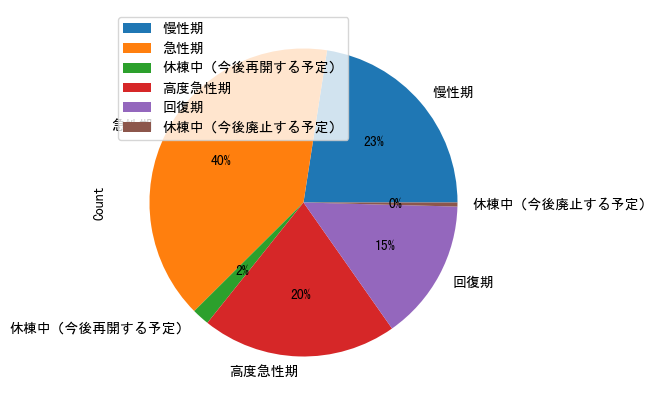

In [144]:
#病棟調査
ward = preprocessing.tag_count(df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"])
ward.plot.pie(subplots=True,figsize=(5, 5),autopct='%.f%%')

In [145]:
df.columns

Index(['病院', '医療機関名_x', '都道府県コード_x', '構想区域コード_x', '構想区域名称_x', '市区町村名称_x',
       '設置主体（2022（令和4）年7月1日時点）', 'DPC医療機関群の種類', '特定機能病院の承認の有無',
       '地域医療支援病院の承認の有無', '総合入院体制加算の届出の有無', '急性期充実体制加算の届出の有無', '三次救急医療施設の認定の有無',
       '二次救急医療施設の認定の有無', '救急告示病院の告示の有無', '病棟コード\n（R4）', '病棟名_x', '建築時期', '構造',
       '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
       '保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）', '一般病床_許可病床', '一般病床_最大使用病床数',
       '一般病床_最小使用病床数', '療養病床_許可病床', '療養病床_最大使用病床数', '療養病床_最小使用病床数',
       '新規入棟患者数（年間）', 'うち予定入院の患者・院内の他病棟からの転棟患者', 'うち、予定外の救急医療入院以外の入院患者（年間）',
       'うち、予定外の救急医療入院の患者（年間）', '在棟患者延べ数（年間）', '退棟患者数（年間）', '新規入棟患者数（年間）.1',
       'うち、院内の他病棟からの転棟（年間）', 'うち、家庭からの入院（年間）', 'うち、他の病院、診療所からの転院（年間）',
       'うち、介護施設、福祉施設からの入院（年間）', 'うち、介護医療院からの入院（年間）', 'うち、院内の出生（年間）',
       'うち、その他（年間）', '構想区域人口', '休日に受診した患者延べ数',
       '休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '夜間・時間外に受診した患者延べ数',
       '夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数', '救急車の受入件数', '施設全体_医師_常勤',
       '施設全体_医師_非常勤', '手術総数', '全身麻酔の

In [147]:
for col in df.columns: #object->float
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        # 変換できない列は無視
        pass

df["病棟総病床数"] = df["一般病床_許可病床"] + df["療養病床_許可病床"]
df['院内総新規入棟患者数（年間）'] = df.groupby("医療機関名_x")['新規入棟患者数（年間）'].transform("sum")
df["院内総一般病床数"] = df.groupby("医療機関名_x")["一般病床_許可病床"].transform("sum")
df["院内総病床数"] = df.groupby("医療機関名_x")["病棟総病床数"].transform("sum")
df["病床数の全体に占める割合"]= df["病棟総病床数"] / df["院内総病床数"] * 100
df["施設全体_医師"] = df["施設全体_医師_常勤"] + df["施設全体_医師_非常勤"]
df = df.loc[df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"] ==  "急性期"].reset_index(drop=True) #急性期病棟の抽出

PREF = ["都道府県コード_x","構想区域名称_x","休日に受診した患者延べ数",'休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',"夜間・時間外に受診した患者延べ数",
        '夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',"救急車の受入件数","施設全体_医師","施設全体_医師_常勤","院内総一般病床数",'院内総新規入棟患者数（年間）']
TARGETS = ["一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）","病床数の全体に占める割合",
            'うち、院内の他病棟からの転棟（年間）','うち、家庭からの入院（年間）','うち、他の病院、診療所からの転院（年間）','うち、介護施設、福祉施設からの入院（年間）',
            'うち、介護医療院からの入院（年間）','うち、院内の出生（年間）','うち、その他（年間）','手術総数','全身麻酔の手術総数','放射線治療','化学療法']
hdf = df.groupby('医療機関名_x')[PREF + TARGETS
                            ].agg({**{m:'first' for m in PREF},**{t:'sum' for t in TARGETS}}).reset_index()
hdf = hdf.join((df.groupby('構想区域名称_x')['構想区域人口'].apply(lambda x: x.mode()[0])), on='構想区域名称_x') #データ補正

hdf["病床利用率"] = hdf["在棟患者延べ数（年間）"] * 100 / (hdf["一般病床_許可病床"] + hdf["療養病床_許可病床"]) / 365 #診療実日数を365日とする
hdf["平均存棟日数"] = hdf["在棟患者延べ数（年間）"] / (hdf["新規入棟患者数（年間）"] + hdf["退棟患者数（年間）"]) * 2
hdf['新規入棟患者数のうち院内の他病棟からの転棟の割合']= hdf['うち、院内の他病棟からの転棟（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち家庭からの入院の割合']= hdf['うち、家庭からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち他の病院、診療所からの転院の割合']= hdf['うち、他の病院、診療所からの転院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち介護施設、福祉施設からの入院の割合']= hdf['うち、介護施設、福祉施設からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち介護医療院からの入院の割合']= hdf['うち、介護医療院からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち院内の出生（年間）']= hdf['うち、院内の出生（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうちその他の割合'] = hdf['うち、その他（年間）'] / hdf['新規入棟患者数（年間）'] * 100

In [148]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   医療機関名_x                               4013 non-null   object 
 1   都道府県コード_x                             4013 non-null   int64  
 2   構想区域名称_x                              4013 non-null   object 
 3   休日に受診した患者延べ数                          4013 non-null   int64  
 4   休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数      4013 non-null   int64  
 5   夜間・時間外に受診した患者延べ数                      4013 non-null   int64  
 6   夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数  4013 non-null   int64  
 7   救急車の受入件数                              4013 non-null   int64  
 8   施設全体_医師                               4013 non-null   float64
 9   施設全体_医師_常勤                            4013 non-null   int64  
 10  院内総一般病床数                              4013 non-null   int64  
 11  院内総新規入棟患者数（年間）   

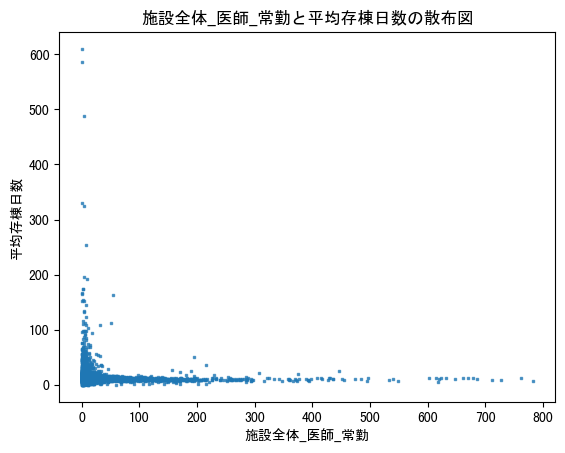

In [149]:
def plot_scatter(df, cols):
    x = df[cols[0]]
    y = df[cols[1]]

    plt.scatter(x, y, s=3, marker='s', alpha=0.7)

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])

    plt.title(f'{cols[0]}と{cols[1]}の散布図')
    plt.show()
    return None

plot_scatter(hdf, ['施設全体_医師_常勤','平均存棟日数'])

### 個別医療機関における救急患者受入に関する評価基準について
1. 医療機関が受け入れた救急搬送患者 / 医療圏人口 *1000
2. 医療機関が受け入れた救急搬送患者 / 構想区域の総救急車受入件数 *100

In [150]:
hdf['構想区域人口あたりの救急車受入件数'] =  hdf['救急車の受入件数'] / hdf['構想区域人口'] * 1000
hdf['構想区域全体の総救急車受入件数'] = hdf.groupby('構想区域名称_x')['救急車の受入件数'].transform("sum")
hdf['個別医療機関の救急車受入数の構想区域全体に占める割合'] = hdf['救急車の受入件数'] / hdf['構想区域全体の総救急車受入件数'] *100

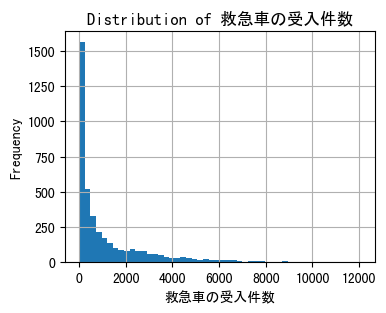

In [151]:
def plot_hist(df,col, bins=None):
    finite_values = df[col][np.isfinite(df[col])]
    plt.figure(figsize=(4, 3))
    finite_values.hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    return None

plot_hist(hdf, '救急車の受入件数')

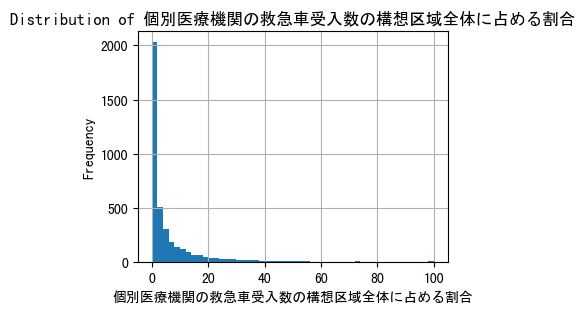

In [152]:
plot_hist(hdf, '個別医療機関の救急車受入数の構想区域全体に占める割合')

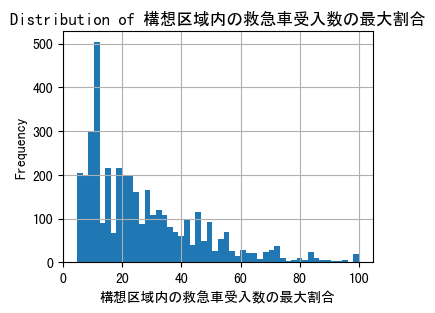

In [153]:
hdf['構想区域内の救急車受入数の最大割合'] = hdf['構想区域名称_x'].map(hdf.groupby('構想区域名称_x')['個別医療機関の救急車受入数の構想区域全体に占める割合'].max())
plot_hist(hdf, '構想区域内の救急車受入数の最大割合')

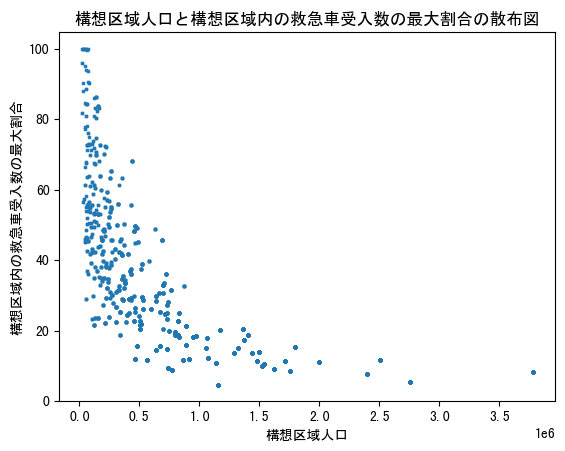

In [154]:
plot_scatter(hdf, ['構想区域人口','構想区域内の救急車受入数の最大割合'])

### 個別医療機関における医師数に関する評価基準について
1. 院内の常勤医師の割合
2. 構想区域の人口あたりの常勤医師数
3. 構想区域の人口あたりの医師数(常勤+非常勤)

In [155]:
hdf['施設全体の医師のうち常勤医師の割合'] = hdf['施設全体_医師_常勤'] / hdf['施設全体_医師'] * 100
hdf['構想区域全体の常勤医師数'] = hdf.groupby('構想区域名称_x')['施設全体_医師_常勤'].transform("sum")
hdf['個別医療機関の常勤医師数の構想区域全体に占める割合'] = hdf['施設全体_医師_常勤'] / hdf['構想区域全体の常勤医師数'] *100
hdf['構想区域全体の医師数'] = hdf.groupby('構想区域名称_x')['施設全体_医師'].transform("sum")
hdf['個別医療機関の医師数の構想区域全体に占める割合'] = hdf['施設全体_医師'] / hdf['構想区域全体の医師数'] *100
hdf['構想区域人口あたりの常勤医師数'] = hdf['施設全体_医師_常勤'] / hdf['構想区域人口'] *1000
hdf['構想区域人口あたりの医師数'] = hdf['施設全体_医師'] / hdf['構想区域人口'] *1000

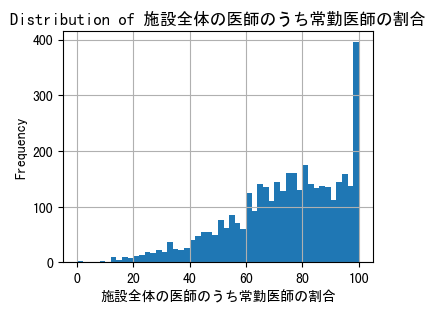

In [156]:
plot_hist(hdf, '施設全体の医師のうち常勤医師の割合')

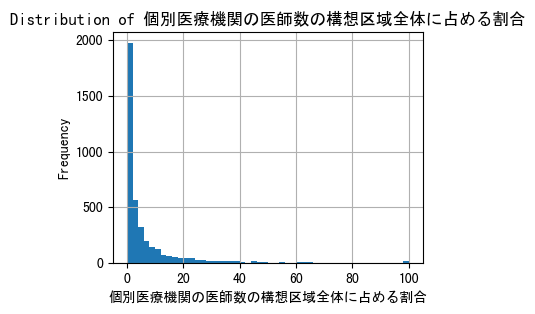

In [157]:
plot_hist(hdf, '個別医療機関の医師数の構想区域全体に占める割合')

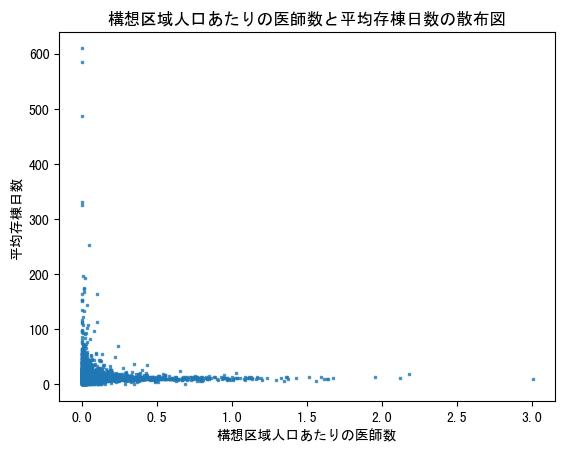

In [158]:
plot_scatter(hdf, ['構想区域人口あたりの医師数','平均存棟日数'])

### 松本千寿氏ご依頼案件
A. 救急受入と新規入棟患者の属性の関係性  
B. 小規模病院(院内一般病床300床未満)のEDA

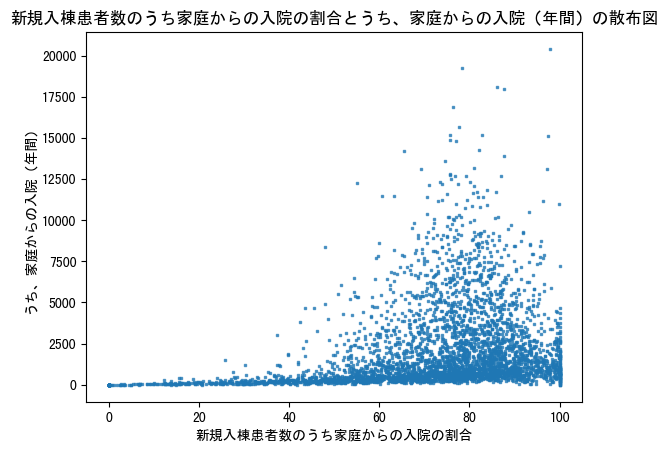

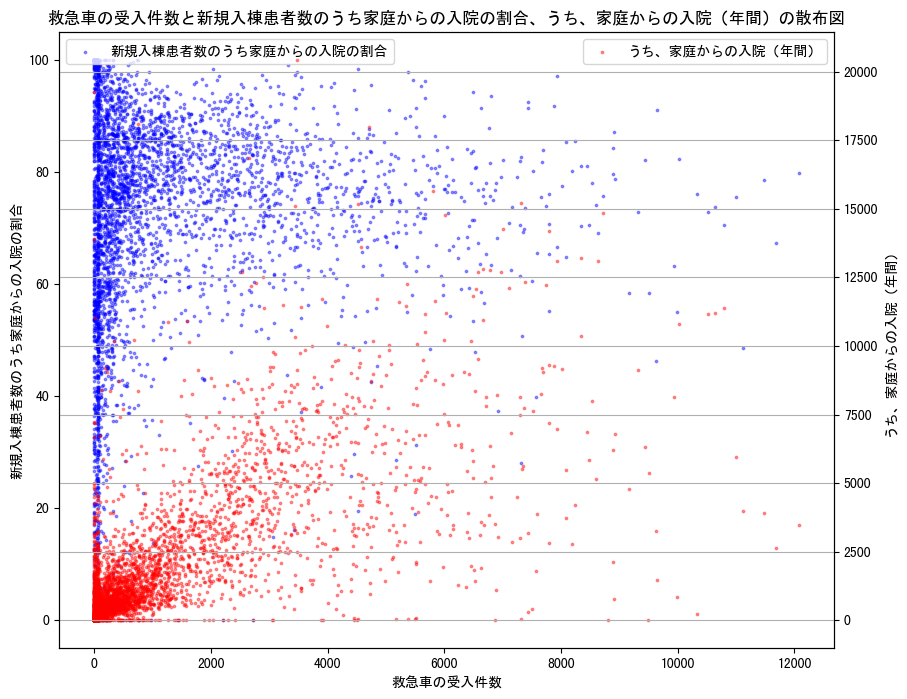

In [159]:
def plot_scatter2(df, cols):
    fig, ax1 = plt.subplots(figsize=(10, 8))
    ax2 = ax1.twinx()
    ax1.scatter(df[cols[0]], df[cols[1]], label=cols[1], color='b', s=3, alpha=0.4)
    ax2.scatter(df[cols[0]], df[cols[2]], label=cols[2], color='r', s=3, alpha=0.4)

    # グラフのタイトルとラベルを設定
    plt.title(f'{cols[0]}と{cols[1]}、{cols[2]}の散布図')

    ax1.set_xlabel(cols[0])
    ax1.set_ylabel(cols[1])
    ax2.set_ylabel(cols[2])
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    return None

plot_scatter(hdf, ['新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'] )
plot_scatter2(hdf, ['救急車の受入件数','新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'])

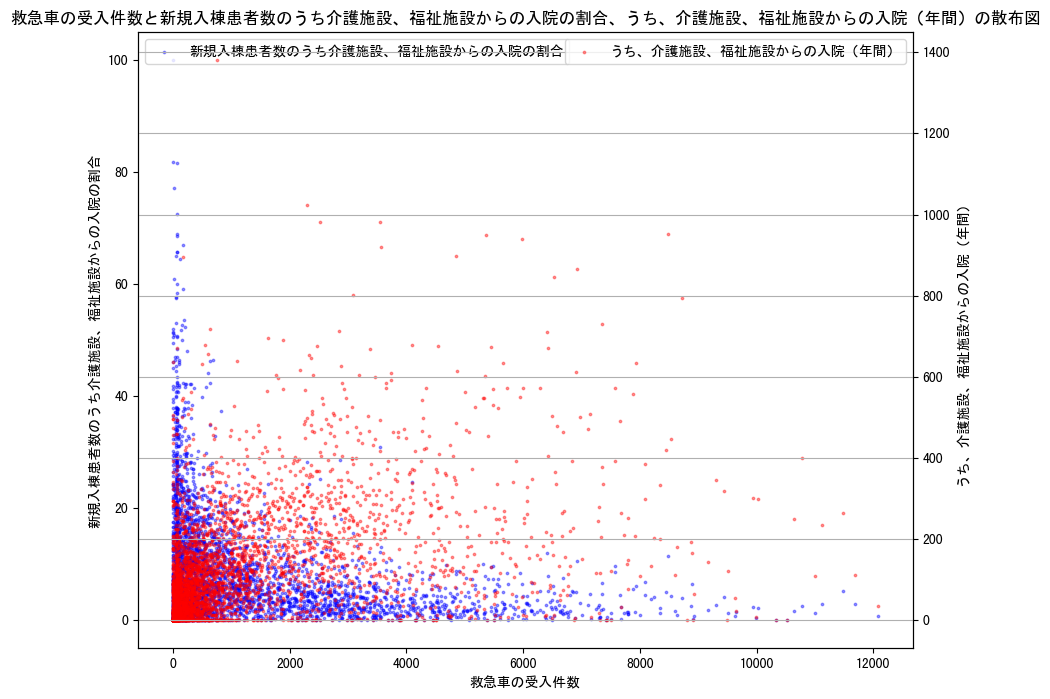

In [160]:
plot_scatter2(hdf, ['救急車の受入件数','新規入棟患者数のうち介護施設、福祉施設からの入院の割合','うち、介護施設、福祉施設からの入院（年間）'])

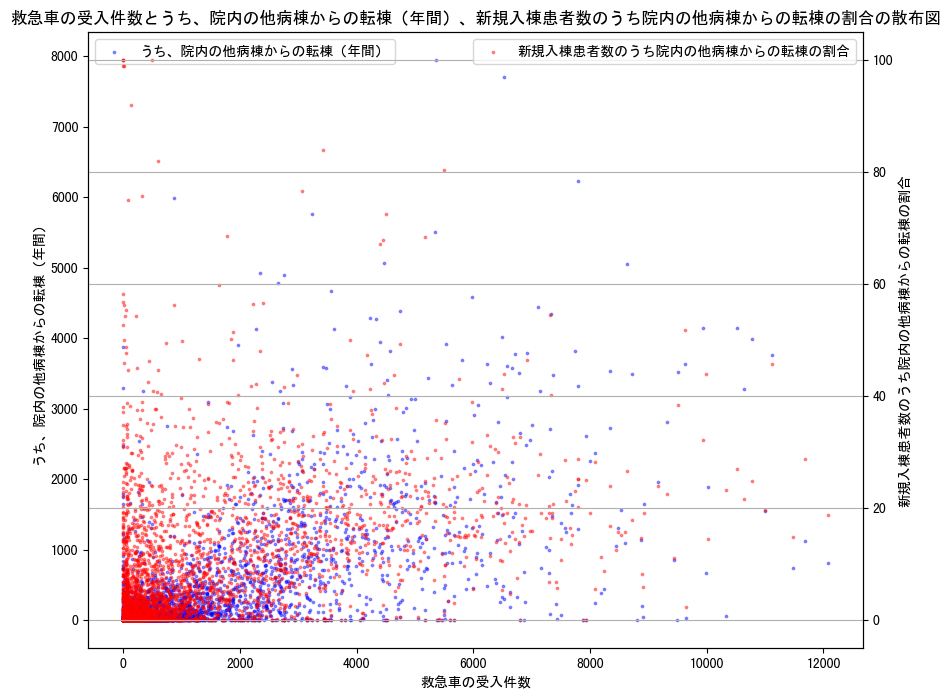

In [161]:
plot_scatter2(hdf, ['救急車の受入件数','うち、院内の他病棟からの転棟（年間）','新規入棟患者数のうち院内の他病棟からの転棟の割合'])

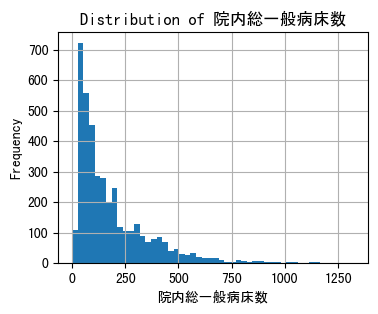

In [162]:
plot_hist(hdf, '院内総一般病床数')

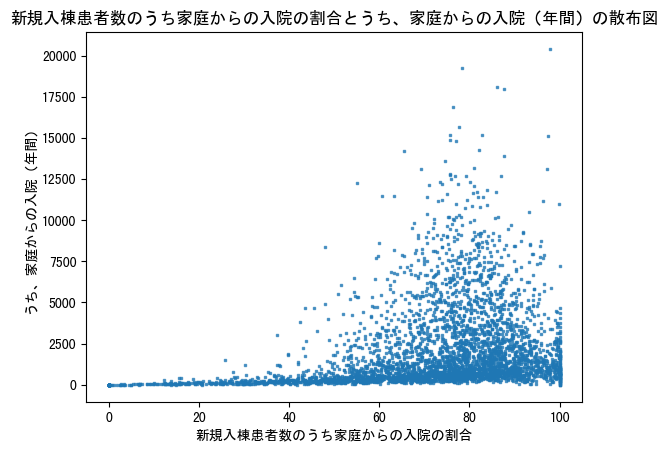

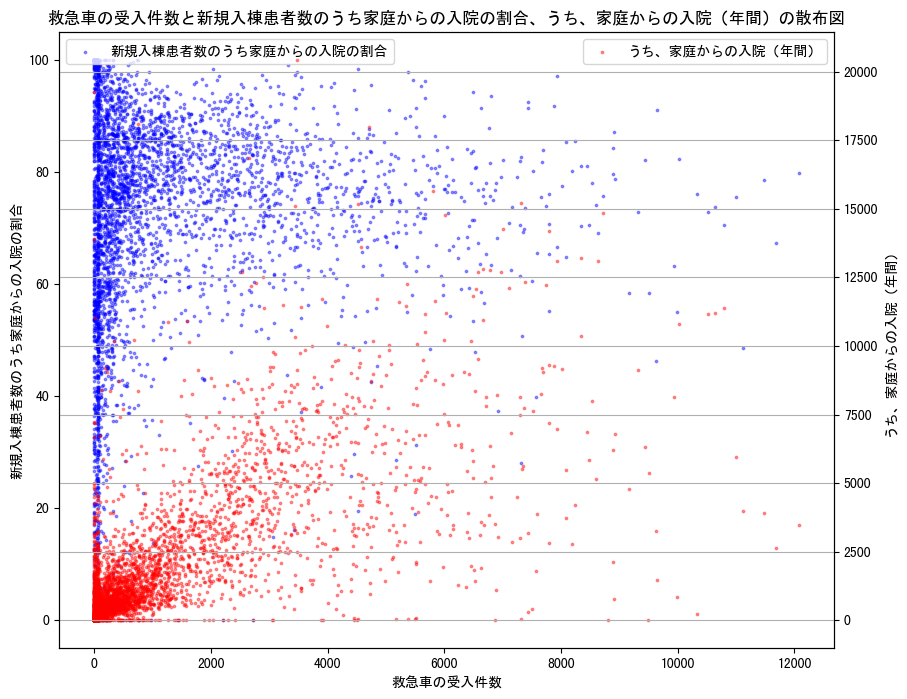

In [163]:
# shdf = hdf[hdf[ '院内総一般病床数'] < 300] #4013 ->3198
plot_scatter(hdf, ['新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'] )
plot_scatter2(hdf, ['救急車の受入件数','新規入棟患者数のうち家庭からの入院の割合','うち、家庭からの入院（年間）'])

In [164]:
#救急車受入件数を9つにカテゴリー分け
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, float('inf')]
labels = [
    '0-250', '251-500', '501-750', '751-1000', '1001-1250',
    '1251-1500', '1501-1750', '1751-2000', '2001+'
]

hdf['救急受入件数のカテゴリー'] = pd.cut(hdf['救急車の受入件数'], bins=bins, labels=labels, right=False)
preprocessing.tag_count(hdf['救急受入件数のカテゴリー'])

,Count
2001+,863
0-250,1580
1001-1250,174
251-500,527
501-750,332
1251-1500,139
751-1000,213
1751-2000,92
1501-1750,93


/tmp/ipykernel_38937/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_38937/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


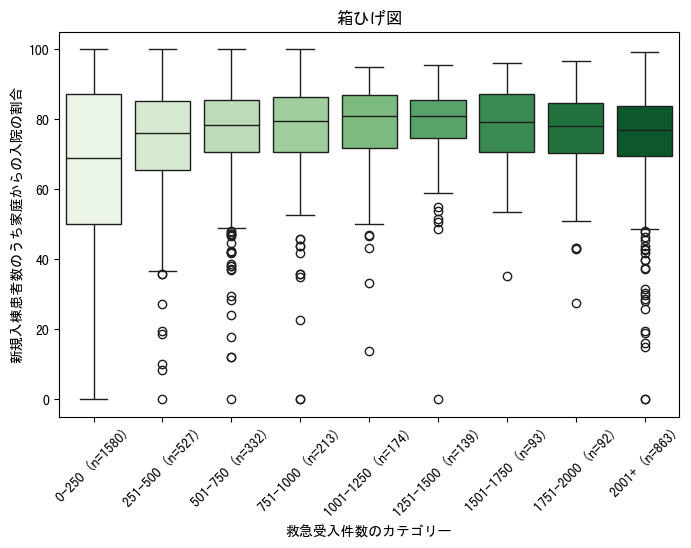

In [165]:
import seaborn as sns

def boxplot_cat(df,cols):
    n_counts = df[cols[0]].value_counts().sort_index()
    category_labels_with_n = [f'{label} (n={n_counts[label]})' for label in labels]

    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
    ax.set_xticklabels(category_labels_with_n, rotation=45)

    plt.xticks(rotation=45)
    plt.title('箱ひげ図')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.show()
    return None

boxplot_cat(hdf, ['救急受入件数のカテゴリー', '新規入棟患者数のうち家庭からの入院の割合'])

下限：Q1 - 1.5×IQR
上限：Q3 + 1.5×IQR

/tmp/ipykernel_38937/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_38937/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


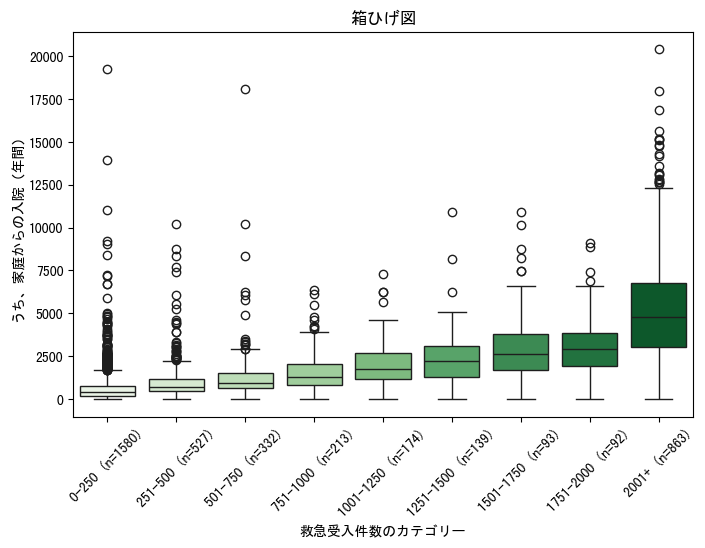

In [166]:
boxplot_cat(hdf, ['救急受入件数のカテゴリー', 'うち、家庭からの入院（年間）'])

/tmp/ipykernel_38937/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_38937/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


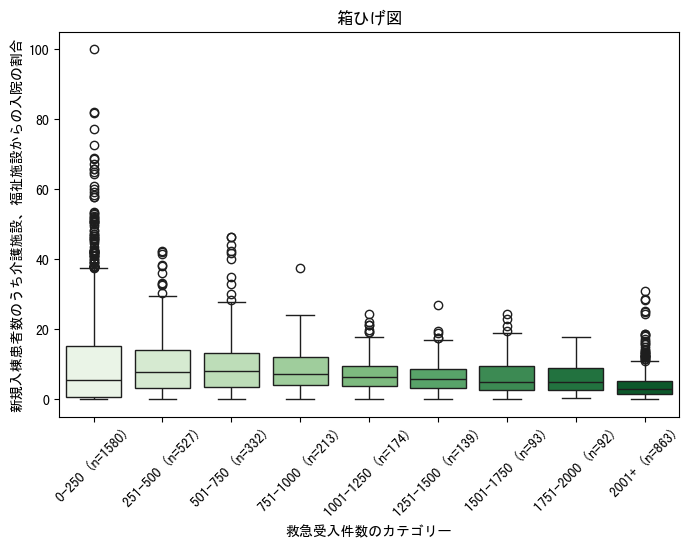

/tmp/ipykernel_38937/1828750063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cols[0], y=cols[1], data=df, palette="Greens")
/tmp/ipykernel_38937/1828750063.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_labels_with_n, rotation=45)


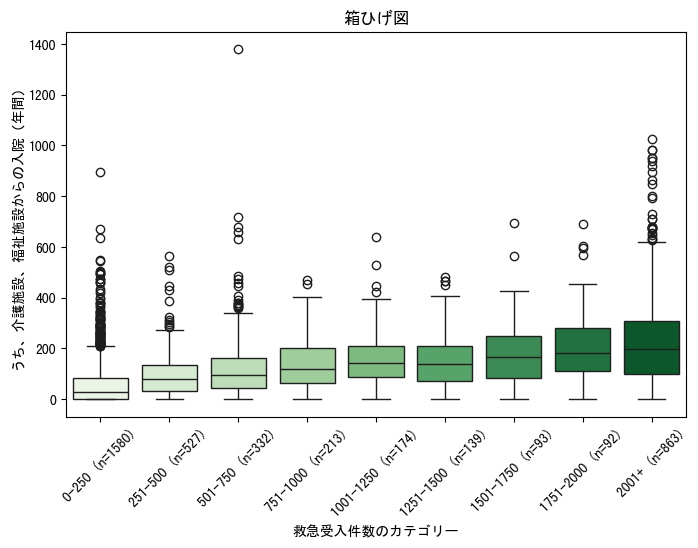

In [167]:
boxplot_cat(hdf, ['救急受入件数のカテゴリー', '新規入棟患者数のうち介護施設、福祉施設からの入院の割合'])
boxplot_cat(hdf, ['救急受入件数のカテゴリー', 'うち、介護施設、福祉施設からの入院（年間）'])

In [168]:
hdf['うち、他病棟、他院から転棟（年間）'] = hdf['うち、院内の他病棟からの転棟（年間）'] + hdf['うち、他の病院、診療所からの転院（年間）']
hdf['うち、施設からの入院（年間）'] = hdf['うち、介護施設、福祉施設からの入院（年間）'] + hdf['うち、介護医療院からの入院（年間）']
hdf['新規入棟患者数のうち他病棟、他院から転棟の割合'] = hdf['うち、他病棟、他院から転棟（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者数のうち施設からの入院の割合'] = hdf['うち、施設からの入院（年間）'] / hdf['新規入棟患者数（年間）'] * 100
hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合'] = hdf['休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'] / hdf['院内総新規入棟患者数（年間）'] * 100 #分母要注意
hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合'] = hdf['夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'] / hdf['院内総新規入棟患者数（年間）'] * 100

In [169]:
#割り算によってinfが発生していることに要注意
print((hdf['新規入棟患者数（年間）'] == 0).sum())
print((hdf['院内総新規入棟患者数（年間）'] == 0).sum())
print(np.isinf(hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合']).sum())
print(np.isinf(hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合']).sum())
print(hdf['新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合'].max())
print(hdf['新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合'].max())

#inf -> nan
hdf = hdf.where(hdf != np.inf, np.nan)

136
115
70
64
inf
inf


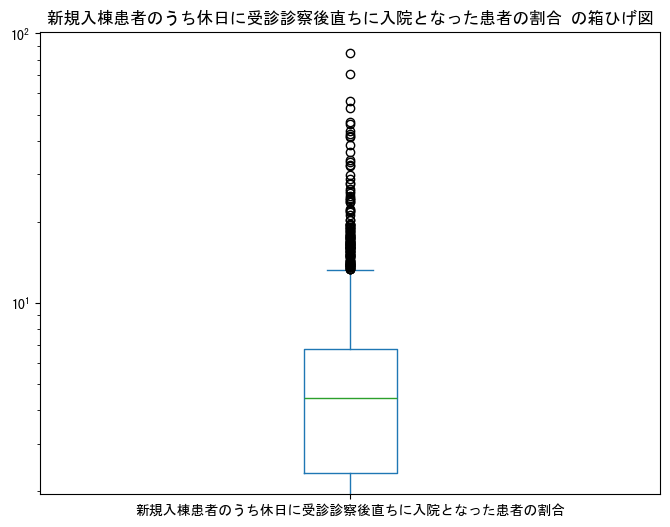

In [170]:
def boxplot(df, col, scale='log'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yscale(scale)
    df[col].plot.box(ax=ax)
    ax.set_title(f'{col} の箱ひげ図')
    plt.show()
    return None

boxplot(hdf,'新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合')

## 何を軸に可視化するか  
1. 人口
2. 救急(+シェア)
3. 入院経路
4. 夜間・休日
5. 平均在棟日数
6. 手術件数
7. 病床利用率
8. 医師数
9. 財政状況
10. 研修医数

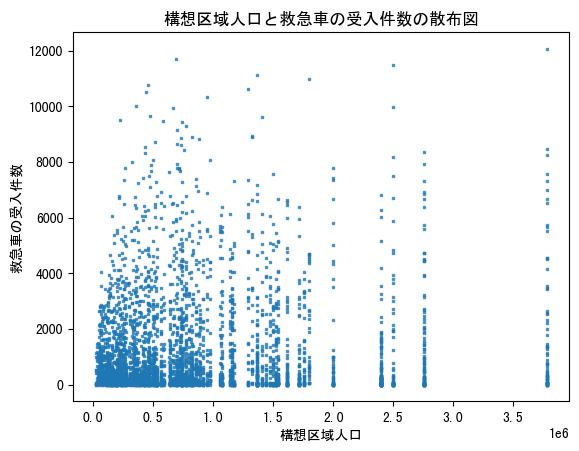

In [171]:
plot_scatter(hdf,['構想区域人口','救急車の受入件数'])

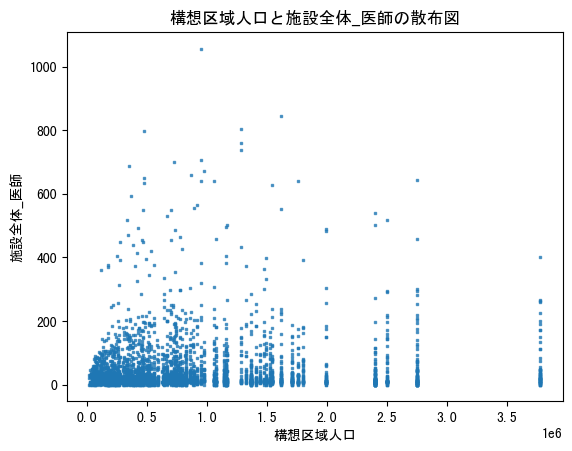

In [172]:
plot_scatter(hdf,['構想区域人口','施設全体_医師'])

### 十和田モデル

In [173]:
hdf[hdf['構想区域名称_x'] == '上十三地域']

,医療機関名_x,都道府県コード_x,構想区域名称_x,休日に受診した患者延べ数,休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,夜間・時間外に受診した患者延べ数,夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,救急車の受入件数,施設全体_医師,施設全体_医師_常勤,院内総一般病床数,院内総新規入棟患者数（年間）,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床数の全体に占める割合,うち、院内の他病棟からの転棟（年間）,うち、家庭からの入院（年間）,うち、他の病院、診療所からの転院（年間）,うち、介護施設、福祉施設からの入院（年間）,うち、介護医療院からの入院（年間）,うち、院内の出生（年間）,うち、その他（年間）,手術総数,全身麻酔の手術総数,放射線治療,化学療法,構想区域人口,病床利用率,平均存棟日数,新規入棟患者数のうち院内の他病棟からの転棟の割合,新規入棟患者数のうち家庭からの入院の割合,新規入棟患者数のうち他の病院、診療所からの転院の割合,新規入棟患者数のうち介護施設、福祉施設からの入院の割合,新規入棟患者数のうち介護医療院からの入院の割合,新規入棟患者数のうち院内の出生（年間）,新規入棟患者数のうちその他の割合,構想区域人口あたりの救急車受入件数,構想区域全体の総救急車受入件数,個別医療機関の救急車受入数の構想区域全体に占める割合,構想区域内の救急車受入数の最大割合,施設全体の医師のうち常勤医師の割合,構想区域全体の常勤医師数,個別医療機関の常勤医師数の構想区域全体に占める割合,構想区域全体の医師数,個別医療機関の医師数の構想区域全体に占める割合,構想区域人口あたりの常勤医師数,構想区域人口あたりの医師数,救急受入件数のカテゴリー,うち、他病棟、他院から転棟（年間）,うち、施設からの入院（年間）,新規入棟患者数のうち他病棟、他院から転棟の割合,新規入棟患者数のうち施設からの入院の割合,新規入棟患者のうち休日に受診診察後直ちに入院となった患者の割合,新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合
197,三沢市立三沢病院,2,上十三地域,2165,276,3808,641,1697,26.0,26,220,4186,220,0,19131,4186,4229,100.000000,626,3313,58,139,0,49,1,1783.0,614.0,130.0,335.0,167931,23.824408,4.546881,14.954611,79.144768,1.385571,3.320592,0.0,1.170569,0.023889,10.105341,5096,33.300628,43.99529,100.000000,88,29.545455,104.9,24.785510,0.154825,0.154825,1501-1750,684,139,16.340182,3.320592,6.593407,15.312948
418,公立七戸病院,2,上十三地域,523,100,652,294,406,9.4,6,110,1382,74,0,13300,908,890,67.272727,10,755,14,113,0,0,16,223.0,64.0,0.0,35.0,167931,49.241022,14.794216,1.101322,83.149780,1.541850,12.444934,0.0,0.000000,1.762115,2.417660,5096,7.967033,43.99529,63.829787,88,6.818182,104.9,8.960915,0.035729,0.055975,251-500,24,113,2.643172,12.444934,7.235890,21.273517
465,公立野辺地病院,2,上十三地域,193,55,373,93,509,9.7,8,120,2183,120,0,34504,2183,2627,79.470199,892,1083,39,169,0,0,0,775.0,217.0,0.0,106.0,167931,78.776256,14.346778,40.861200,49.610628,1.786532,7.741640,0.0,0.000000,0.000000,3.031007,5096,9.988226,43.99529,82.474227,88,9.090909,104.9,9.246902,0.047639,0.057762,501-750,931,169,42.647732,7.741640,2.519469,4.260192
1030,医療法人泰仁会十和田第一病院,2,上十三地域,673,235,255,72,172,8.4,2,60,1512,60,0,14822,1512,1518,100.000000,0,422,195,895,0,0,0,90.0,0.0,0.0,15.0,167931,67.680365,9.783498,0.000000,27.910053,12.896825,59.193122,0.0,0.000000,0.000000,1.024230,5096,3.375196,43.99529,23.809524,88,2.272727,104.9,8.007626,0.011910,0.050021,0-250,195,895,12.896825,59.193122,15.542328,4.761905
1501,医療法人社団良風会ちびき病院,2,上十三地域,141,60,60,45,50,5.5,4,53,951,53,0,12852,889,895,48.181818,0,738,12,139,0,0,0,162.0,30.0,0.0,45.0,167931,66.435772,14.408072,0.000000,83.014623,1.349831,15.635546,0.0,0.000000,0.000000,0.297741,5096,0.981162,43.99529,72.727273,88,4.545455,104.9,5.243089,0.023819,0.032752,0-250,12,139,1.349831,15.635546,6.309148,4.731861
1728,医療法人赤心会十和田東病院,2,上十三地域,54,0,53,0,20,5.9,4,60,741,60,0,13518,741,762,100.000000,0,724,15,2,0,0,0,285.0,260.0,0.0,25.0,167931,61.726027,17.988024,0.000000,97.705803,2.024291,0.269906,0.0,0.000000,0.000000,0.119097,5096,0.392465,43.99529,67.796610,88,4.545455,104.9,5.624404,0.023819,0.035133,0-250,15,2,2.024291,0.269906,0.000000,0.000000
1789,十和田市立中央病院,2,上十三地域,2013,457,5482,1439,2242,40.0,38,318,6215,192,0,49595,3634,3626,60.377358,7,3368,86,172,0,0,1,1219.0,328.0,85.0,198.0,167931,70.769121,13.662534,0.192625,92.680242,2.366538,4.733076,0.0,0.000000,0.027518,13.350721,5096,43.995290,43.99529,95.000000,88,43.181818,104.9,38.131554,0.226283,0.238193,2001+,93,172,2.559163,4.733076,7.353178,23.153660


### 救急車受入件数ベース解析

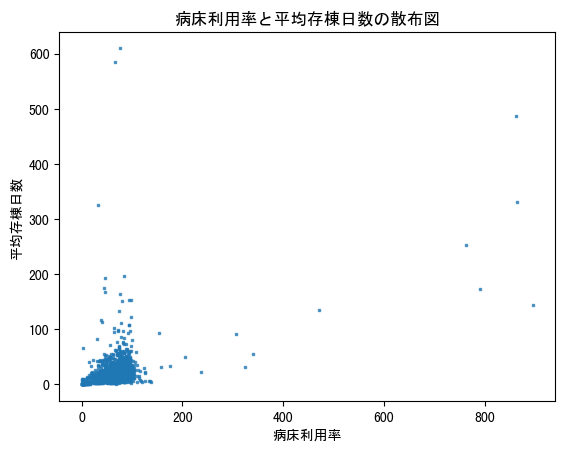

In [174]:
plot_scatter(hdf[hdf['救急車の受入件数'] <= 500], ['病床利用率','平均存棟日数'])

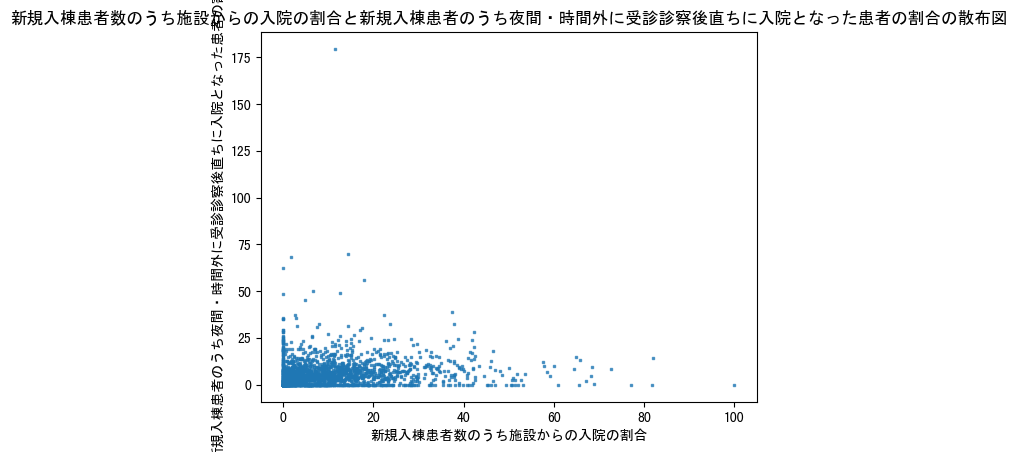

In [175]:
plot_scatter(hdf[hdf['救急車の受入件数'] <= 500], ['新規入棟患者数のうち施設からの入院の割合','新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合'])

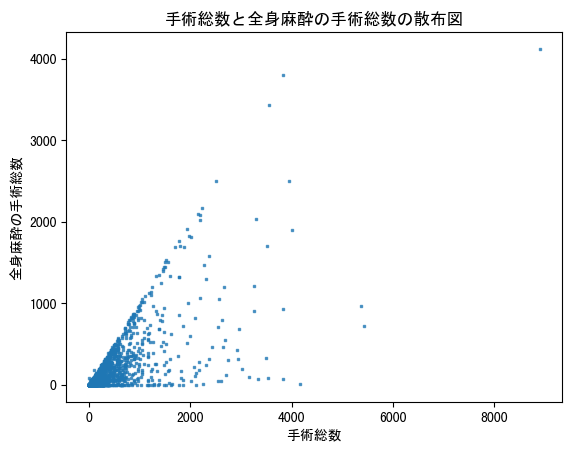

In [181]:
plot_scatter(hdf[hdf['救急車の受入件数'] <= 500], ['手術総数','全身麻酔の手術総数'])

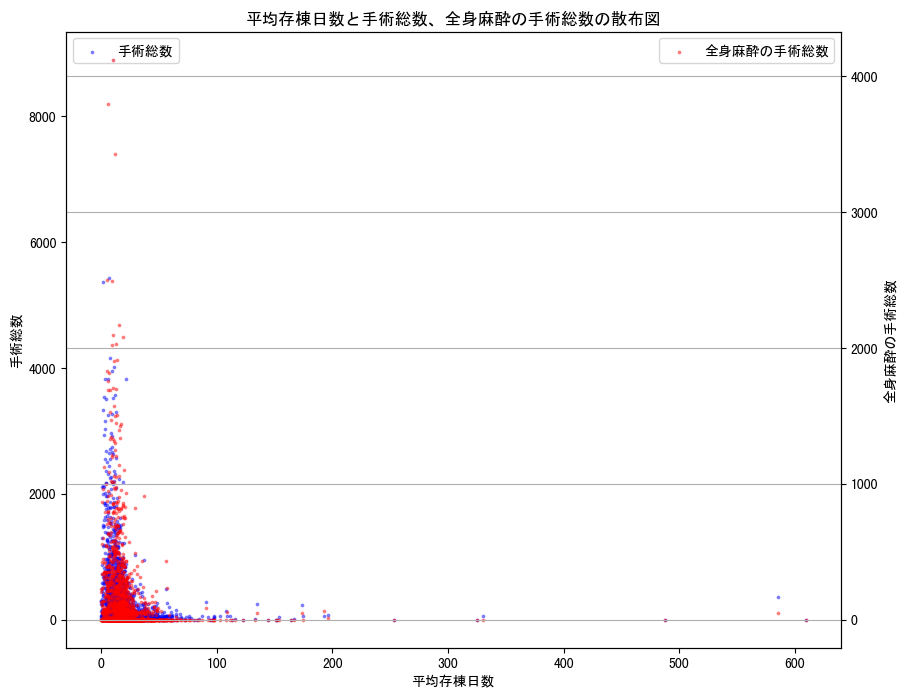

In [180]:
plot_scatter2(hdf[hdf['救急車の受入件数'] <= 500], ['平均存棟日数','手術総数','全身麻酔の手術総数'])

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 2主成分に削減

# 主成分に変換
X_pca = pca.fit_transform(hdf)

# 主成分の分散比を出力
print(pca.explained_variance_ratio_)

## 相関マッピング

/workspace/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.draw()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


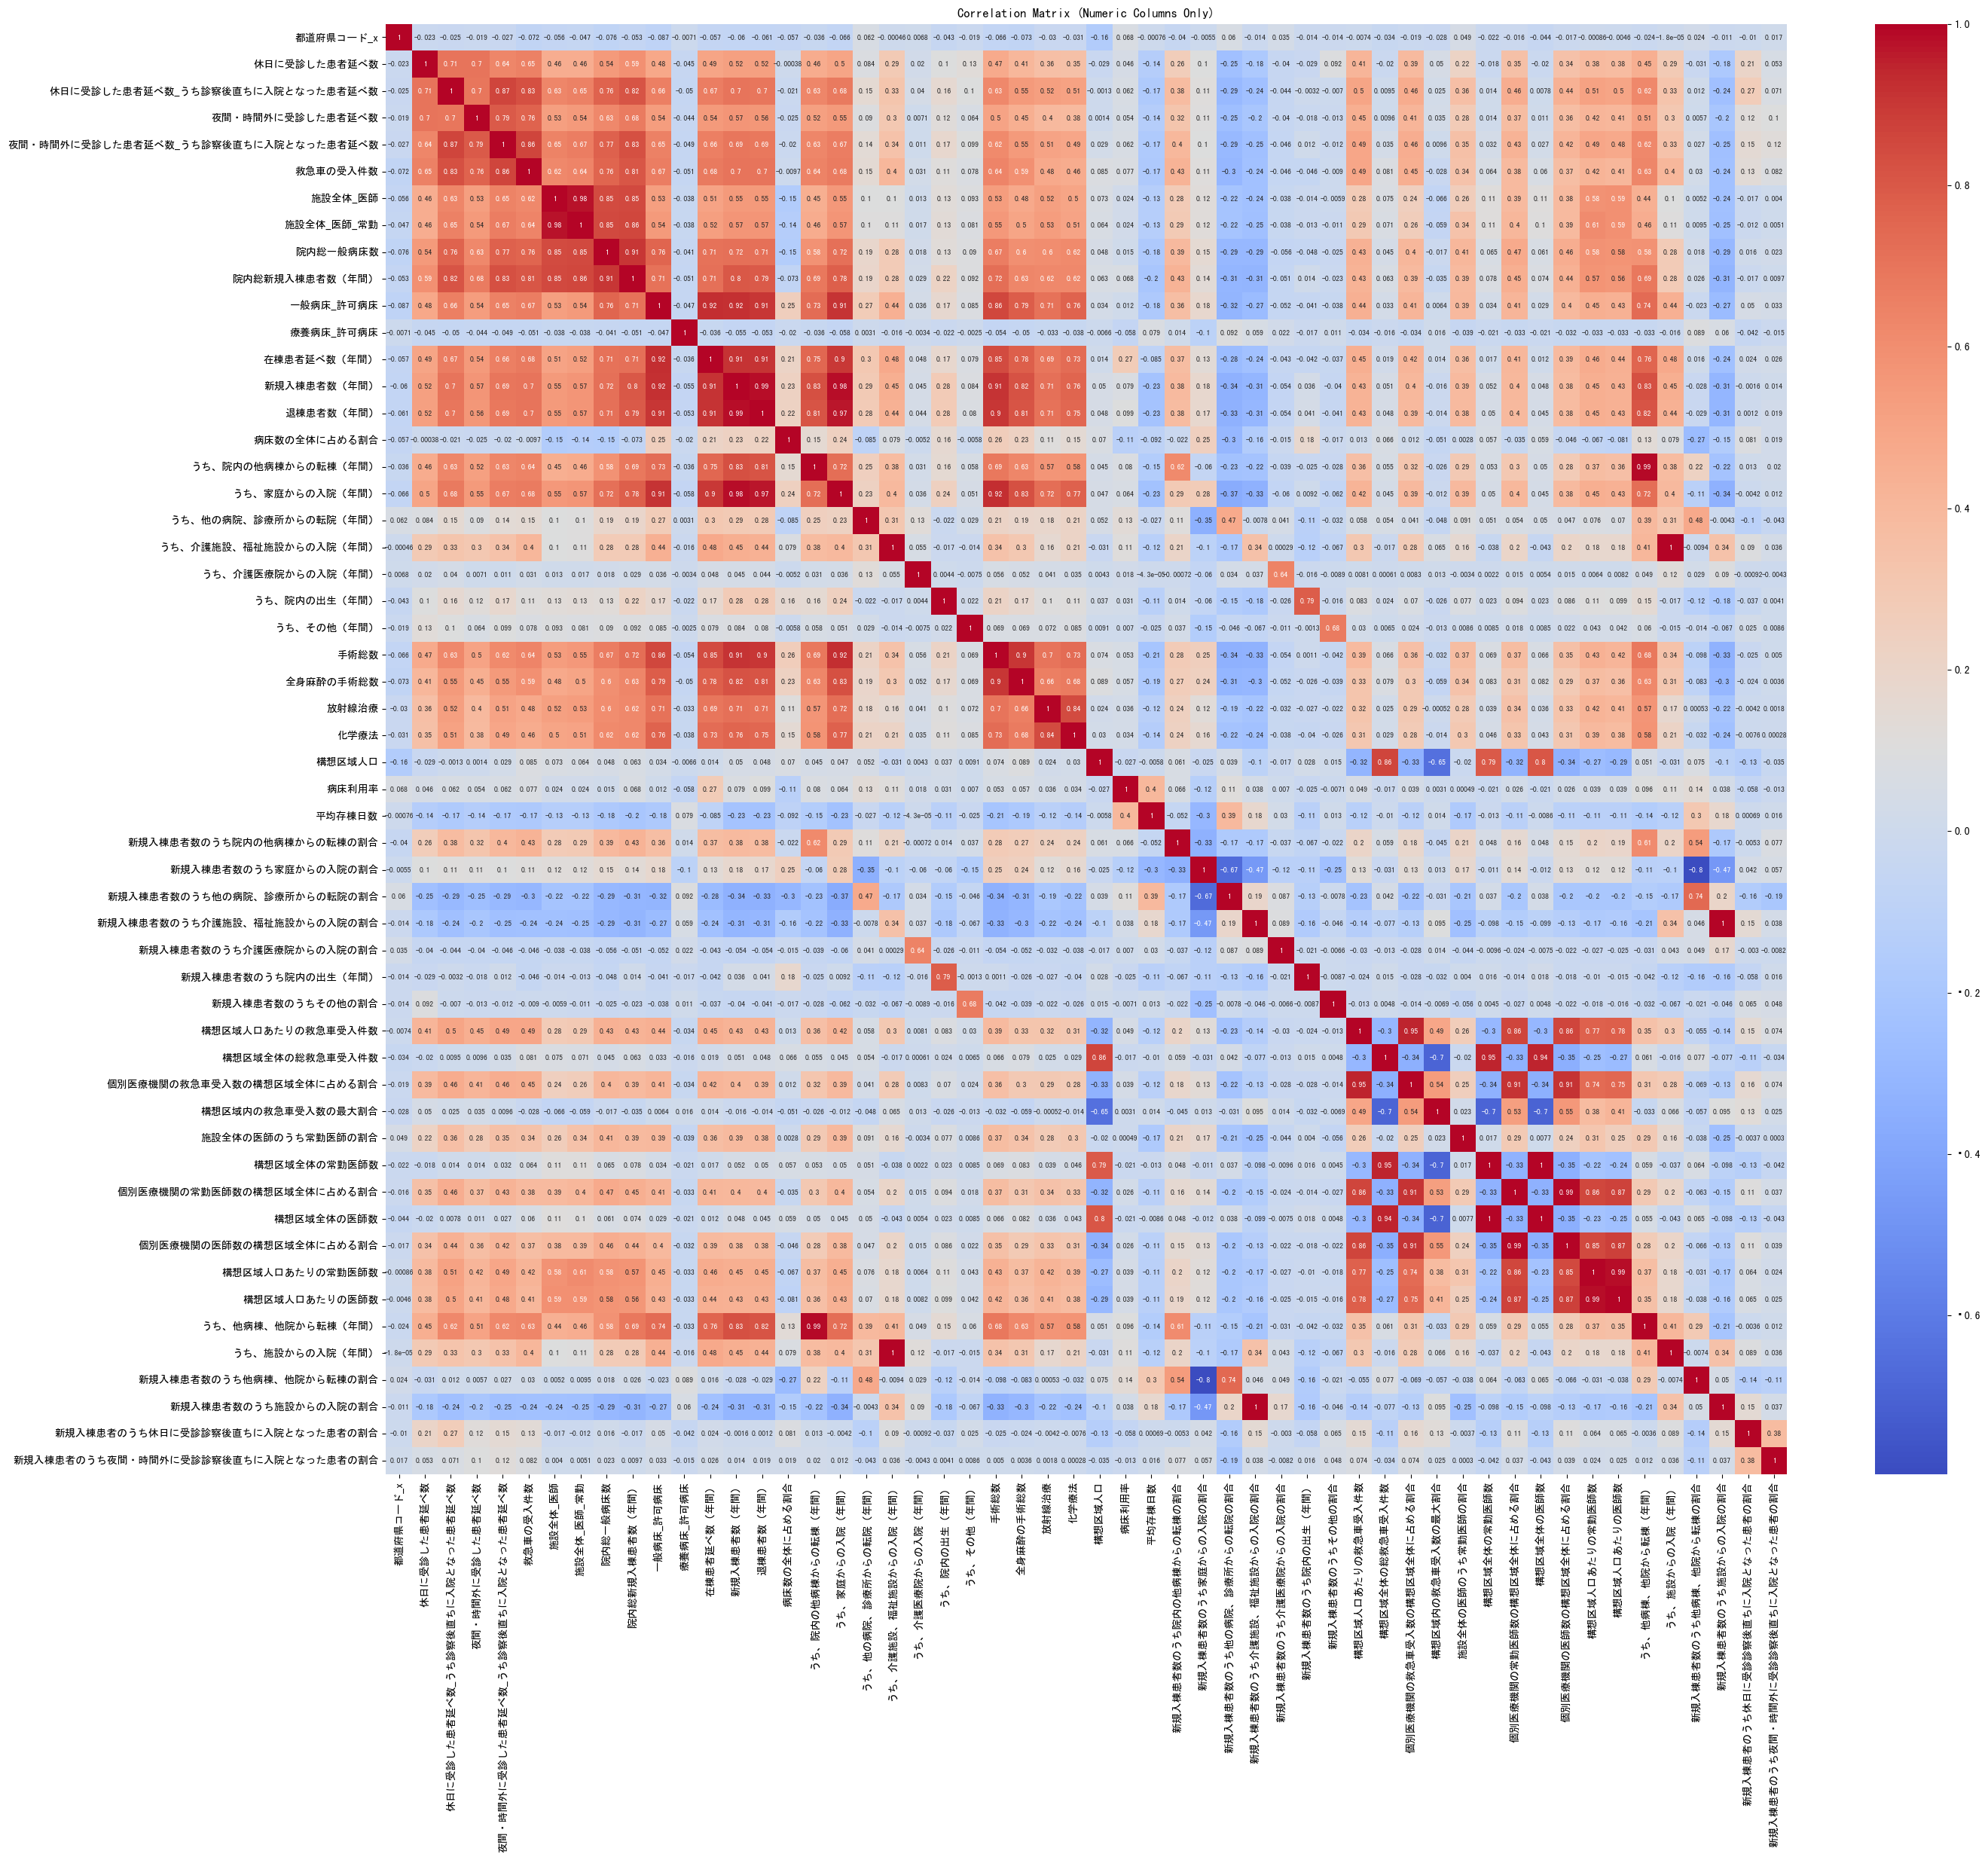

In [176]:
numeric_cols = hdf.drop(['救急受入件数のカテゴリー'],axis=1).select_dtypes(exclude=[object]).columns
corr = hdf[numeric_cols].corr() #相関行列を計算

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 7})
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()